### ML101 : Neural Network
14-09-2016,  
Jan Fait,  
Digital Marketing,  
Munich

In [4]:
%matplotlib inline

### Neural Network, The Hype

Most people imagine something like this and back away in fear.  
This is indeed what it looks like, but without the 3D graphics.

![](https://takinginitiative.files.wordpress.com/2008/04/neural-network-rotator.jpg)


### Rewind to perceptron

You have seen the perceptron in the first of your classes.
The perceptron - yes, you can call it a **neuron** - is linear separator.

It can separate linearly separable data - it can draw a line between a bunch of points.

![](http://natureofcode.com/book/imgs/chapter10/ch10_07.png)




### MLP

Very often, you see the term MLP Network.

This is essentially a **M**ulti-**L**ayer-**P**erceptron.

Input layer are the perceptrons fed with a input vector, Hidden layer are some more perceptrons.


![](http://www.texample.net/media/tikz/examples/PNG/neural-network.png)

### What is the extra layer for? The exclusive or (XOR) problem.

Remember. Perceptron only does linearly separable problems.

Take boolean inputs **a** and **b**.  
We want the output to be **True** if: 

(**a** and **not b**) or (**not a** and **b**)

![](http://srv-marketing1.muc.ecircle.de/utils/xor.PNG)


In [5]:
def logical_xor(a, b):
    return bool(a) ^ bool(b)

logical_xor(1,0), logical_xor(0,1), logical_xor(1,1)

(True, True, False)


### Something as simple as XOR is not linearly separable.

We need a **combined** decision of the nodes. One decision on the **OR**, one decision on the **AND**.

![](http://uk-calling.com/other/uni/xor.gif)

### What are the numbers on the connections?

Remember perceptron, these are **the weights**. Whatever comes from the input is multiplied by a connection weight before reaching the next layer.


**A=0 and B=1**: 
+ sum(A,B) > 1/2 but also sum(A,B) < 3/2 
+ upper node is activated resulting in a 1 
+ lower node is not activated resulting in a 0. 
+ (1 x 1) + (0 x -1) > 1/2 so the output is 1.

**A=1 and B=1**:

+ sum(A,B) > 1/2 and sum(A,B) > 3/2
+ both nodes get activated
+ (1 x 1) + (1 x -1) < 1/2 so the output is 0.

![](http://uk-calling.com/other/uni/xor.gif)

### How did we get to those 1/2 and 3/2 numbers though?

 We didn't, the network did. Through training. They are the results of several runs of the A,B pairs through the network.

## Backpropagation for training the network

Backpropagation is the most common way the network learns the right weights.

Steps it takes:

+ Initialize random weights W1,W2 on the layers

+ Feed the input matrix X into the first layer and on to others

$Layer0 = X$  
$Layer1 = nonlinear(W1 * Layer0)$  
$Layer2 = nonlinear(W2 * Layer1)$  

+ Compare the result of this with the expected Y vector

+ Caluculate error in prediction

+ Feed this error back through the network 




### What does the nonlinear function thing do?

+ It is an activation function.   
+ It defines, how much should the output react to the input of the previous layer.  
+ A multilayer network using only linear activation functions is equivalent to some single layer, linear network.  
+ In other words, in order to make a linear transformation, you don't need an extra layer.

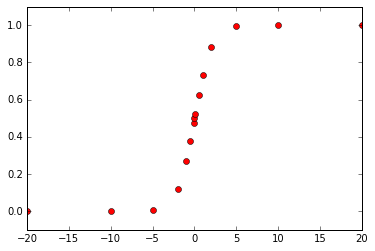

In [6]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)
	return 1/(1+np.exp(-x))

scaling_input = [-20,-10,-5,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,5,10,20];
nonlinear_scaling = [];

for i in scaling_input :
    nonlinear_scaling.append(nonlin(i))   

import matplotlib.pyplot as plt
plt.plot(scaling_input,nonlinear_scaling, 'ro')
plt.axis([-20,20, -0.1, 1.1])
plt.show()   
#this is our non-linear transformation function
#it recieves an input and scales between 0 and 1



In [7]:

#input matrix
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

#expected output matrix
y = np.array([[0],[1],[1],[0]])

#set random seed
np.random.seed(1)

# randomly initialize our weights with mean 0
# 3x4 matrix for weights of each of the layers (input,layer1,layer2 x 4 nodes)
weights0 = 2*np.random.random((3,4)) - 1
# 1x4 matrix for the output
weights1 = 2*np.random.random((4,1)) - 1

In [8]:
for j in range(60000):

    # feed forward through layers 0, 1, and 2
    layer0 = X
    #dot product of the input matrix and the first layer of weights
    layer1 = nonlin(np.dot(layer0,weights0))
    #dot product of the output of the layer 1 with weights of layer 2
    layer2 = nonlin(np.dot(layer1,weights1))

    # how much did we miss the target value?
    layer2_error = y - layer2
    if (j% 10000) == 0:
        print("Errors:")
        print(layer2_error)
    
    #on every 10000 interations print mean error of classification
    if (j% 10000) == 0:
        print("Mean Absolute Error:" + str(np.mean(np.abs(layer2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    layer2_delta = layer2_error*nonlin(layer2,deriv=False)
    if (j% 10000) == 0:
        print("Adjusting weights by deltas:")
        print(layer2_delta)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    layer1_error = layer2_delta.dot(weights1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    # this is where scaling is needed - if we didn't scale, we would adjust too much.
    layer1_delta = layer1_error * nonlin(layer1,deriv=False)
    
    #adjust the weights on the layer by their product with the deltas
    # = multiply output delta and layer input activation to get the gradient of the weight.
    weights1 += layer1.T.dot(layer2_delta)
    weights0 += layer0.T.dot(layer1_delta)

Errors:
[[-0.47372957]
 [ 0.51104304]
 [ 0.45615914]
 [-0.54470837]]
Mean Absolute Error:0.496410031903
Adjusting weights by deltas:
[[-0.29194348]
 [ 0.31677549]
 [ 0.28861437]
 [-0.34474975]]
Errors:
[[-0.00258945]
 [ 0.00182417]
 [ 0.00141689]
 [-0.00259128]]
Mean Absolute Error:0.00210544735288
Adjusting weights by deltas:
[[-0.0012964 ]
 [ 0.00133292]
 [ 0.00103543]
 [-0.00129732]]
Errors:
[[-0.00137415]
 [ 0.00093858]
 [ 0.0007877 ]
 [-0.00137466]]
Mean Absolute Error:0.00111877251414
Adjusting weights by deltas:
[[-0.00068754]
 [ 0.00068599]
 [ 0.00057574]
 [-0.0006878 ]]
Errors:
[[-0.00093787]
 [ 0.00063115]
 [ 0.00054915]
 [-0.00093812]]
Mean Absolute Error:0.000764071627177
Adjusting weights by deltas:
[[-0.00046916]
 [ 0.00046133]
 [ 0.0004014 ]
 [-0.00046928]]
Errors:
[[-0.00071252]
 [ 0.00047518]
 [ 0.0004225 ]
 [-0.00071267]]
Mean Absolute Error:0.000580718687431
Adjusting weights by deltas:
[[-0.00035639]
 [ 0.00034734]
 [ 0.00030884]
 [-0.00035646]]
Errors:
[[-0.0005747

## How many hidden layers?

As always. Consider the complexity of the problem. 

**Too few** - the network will not be able to grasp the dimensionality of the problem and ends up being too simple.

**Too many** - the network overfits - learns the training data, not the underlying problem

![](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying.png)



### Summary

We understood, how the neural network works:

+ It is essentially a number of perceptrons in multiple layers
+ The input is fed into the first layer, multiplied by its node's weights, scaled and sent further
+ Scaling allows solution of non-linear problems and makes activation of next layer nodes easier
+ After the output layer gets to a conclusion, it is compared with the expected result and if not same, it is adjusted by a certain margin and fed back through the network where weights are adjusted
+ We rarely see how did the network arrive to a conclusion, it is a black-box method


That's it for today. Thank you.

### References

[Scikit-Learn NN module](http://scikit-learn.org/dev/modules/neural_networks_supervised.html)  
[Excellent chapter from Nature of Code on NN](http://natureofcode.com/book/chapter-10-neural-networks/)  
[Backpropagation step by step](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)  